# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)

Bonus 2:  Who is your favorite Pokemon?

----

**Submit this file on Moodle on the submission link I will provide. This is due September 25 12nn.**

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("data/Pokemon.csv")

In [3]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


#### 1. How many Legendary Pokemon are there? ( 1pt )
---

In [4]:
df.isLegendary.value_counts().loc[True] # 1. There 46 legendary Pokemons

46

#### 2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )
---

In [5]:
df['Attack-hp-ratio'] = df['Attack']/df['HP']
df[['Name','Attack-hp-ratio']].loc[df['Attack-hp-ratio'].argmax()] # Shedinja has the highest attack-to-HP ratio (90).

Name               Shedinja
Attack-hp-ratio        90.0
Name: 291, dtype: object

#### 3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )
---

In [6]:
df['isFireType'] = (df['Type_2'] == 'Fire') | (df['Type_1'] == 'Fire')
color = pd.get_dummies(df.Color, prefix='Color') 
df = df.join(color)
df

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color_Black,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,0,0,1,0,0,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,0,0,1,0,0,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0,0,0,1,0,0,0,0,0,0
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0,0,0,0,0,0,0,1,0,0
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,0,0,0,0,0,0,0,1,0,0
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,0,0,0,1,0,0,0,0,0,0
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0,0,0,0,0,1,0,0,0,0
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,0,0,0,0,0,0,1,0,0,0


In [7]:
df.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
Attack-hp-ratio     float64
isFireType             bool
Color_Black           uint8
Color_Blue            uint8
Color_Brown           uint8
Color_Green           uint8
Color_Grey            uint8
Color_Pink            uint8
Color_Purple          uint8
Color_Red             uint8
Color_White           uint8
Color_Yellow          uint8
dtype: object

In [8]:
# Remove all columns where type is object
df_new = df.select_dtypes(exclude=['object'])
df_new = df_new.drop(df_new.columns[0:2], axis=1)
df_new = df_new.drop(['Pr_Male','isLegendary'], axis=1)
df_new.dtypes

HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
hasGender              bool
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Attack-hp-ratio     float64
isFireType             bool
Color_Black           uint8
Color_Blue            uint8
Color_Brown           uint8
Color_Green           uint8
Color_Grey            uint8
Color_Pink            uint8
Color_Purple          uint8
Color_Red             uint8
Color_White           uint8
Color_Yellow          uint8
dtype: object

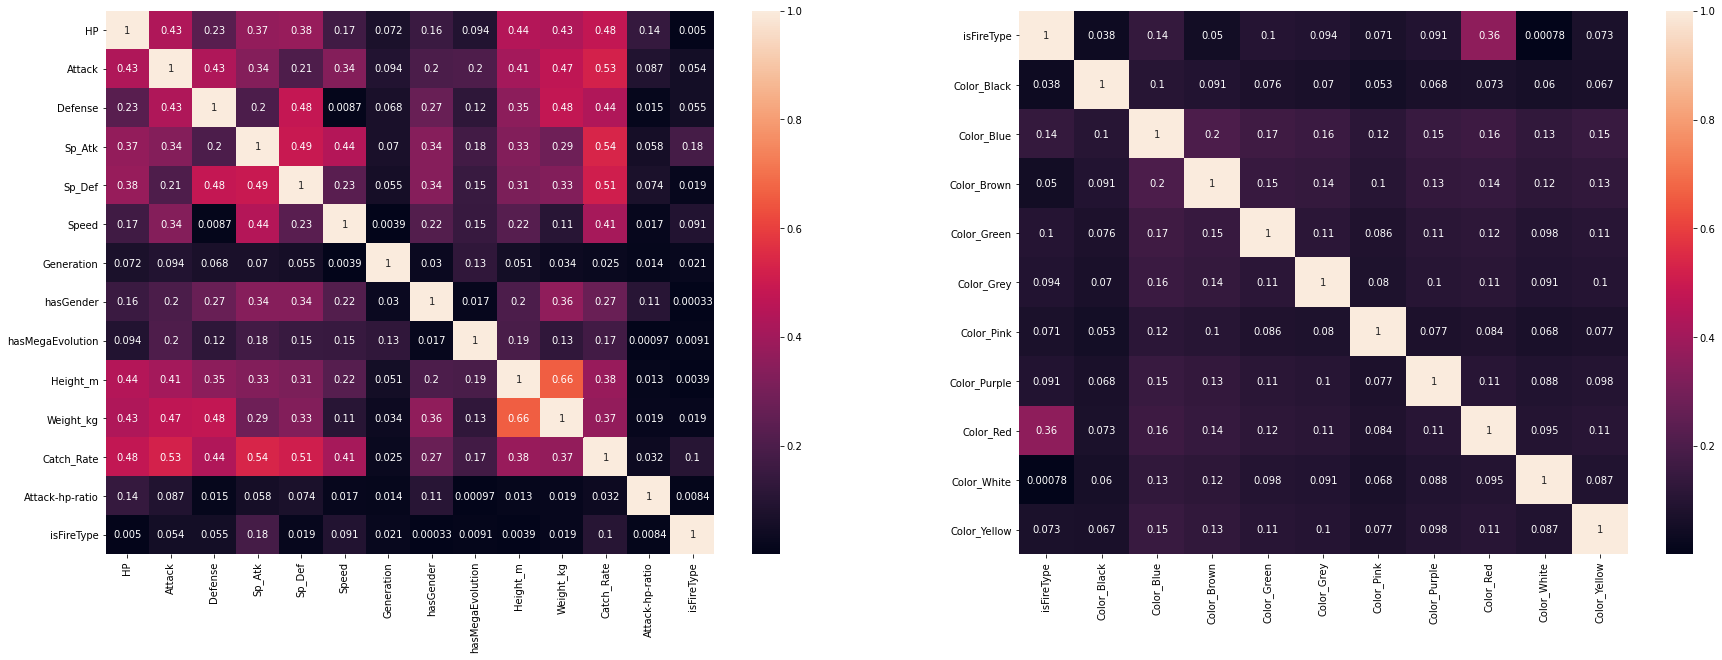

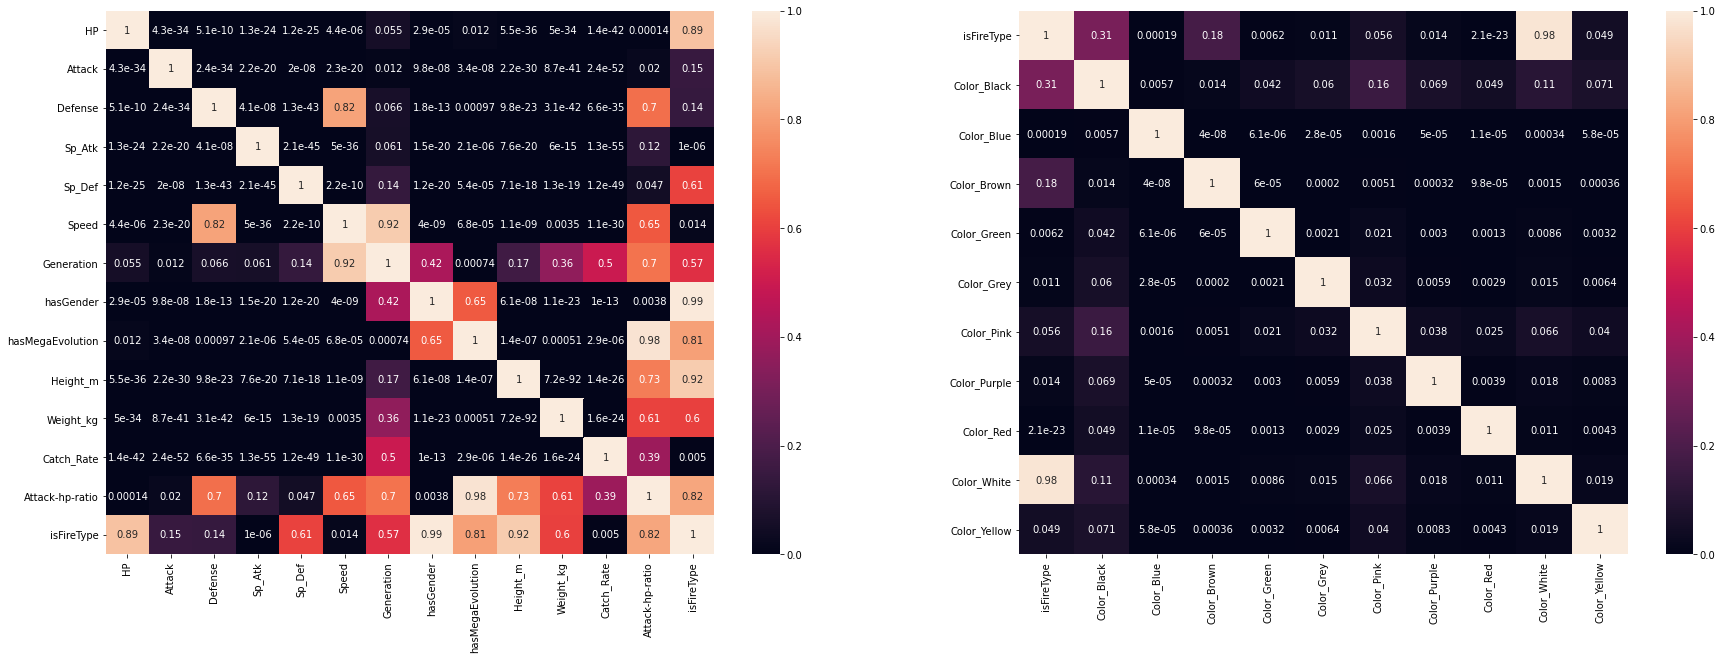

In [9]:
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]
    
# Check correlation of fire type with attributes
df_attributes_corr = df_new[df_new.columns[0:14]].corr(method='pearson').abs()
df_attributes_pvalues = df_new[df_new.columns[0:14]].corr(method=pearsonr_pval)

# Check correlation of fire type with color
df_colors_corr = df_new[df_new.columns[13:25]].corr(method='pearson').abs()
df_colors_pvalues = df_new[df_new.columns[13:25]].corr(method=pearsonr_pval)

# Heatmap of correlation coefficients
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.heatmap(df_attributes_corr, annot=True)
plt.subplot(1,2,2)
sns.heatmap(df_colors_corr, annot=True)
plt.show()

# Heatmap of P-Values
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.heatmap(df_attributes_pvalues, annot=True)
plt.subplot(1,2,2)
sns.heatmap(df_colors_pvalues, annot=True)
plt.show()

In [11]:
significant_attr = df_new[['Attack','Defense','Sp_Atk','Sp_Def','Speed','Generation','Catch_Rate','Weight_kg']] # Get features with coerrcoeff > 0.01
significant_colors = df_new[['Color_Red','Color_Blue','Color_Green','Color_Grey','Color_Purple']] # Get features with coerrcoeff >= ~0.1

# If based on P-values < 0.05
# significant_attr = df_new[['Sp_Atk','Speed','Catch_Rate']]
# significant_colors = df_new[['Color_Blue','Color_Green','Color_Grey','Color_Purple','Color_Red','Color_Yellow']] # Get features with coerrcoeff >= ~0.1

X = significant_attr.join(significant_colors)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isFireType"],
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42) # Make sure splits are reproducible

logistic_model = LogisticRegression(class_weight="balanced", max_iter=1000) # Way to adjust the bias. For binary classifications, it's usually auto or bias

logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
prediction = logistic_model.predict(X)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

#### 4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )
---

<AxesSubplot:>

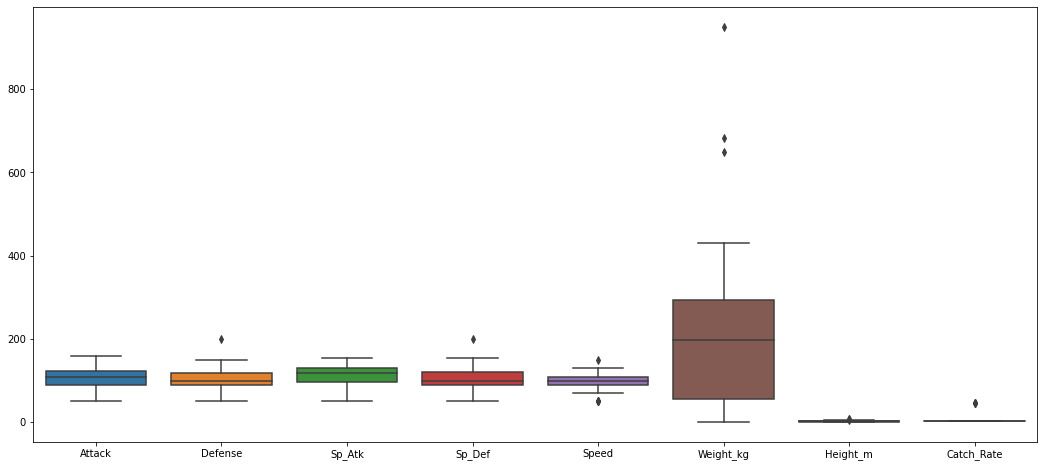

In [13]:
plt.figure(figsize=(18,8))

df3 = df[(df['isLegendary']== True)]#selecting legendary type 
df3 = df3[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m", 'Catch_Rate']]
sns.boxplot(data = df3)

#### 5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )
---

In [14]:
df_prob = df # 5. Probabilities of Pokemon being a fire type
df_prob["FireTypePred"] = prediction

prob =[x[1] for x in logistic_model.predict_proba(X)]

df_prob["FireTypeProb"] = prob
selection = df_prob[["Name","isFireType","FireTypePred", "FireTypeProb"]]
selection[selection["isFireType"] == True].sample(10)

,Name,isFireType,FireTypePred,FireTypeProb
323,Torkoal,True,False,0.260996
321,Numel,True,False,0.431653
497,Tepig,True,True,0.885037
606,Litwick,True,False,0.437029
466,Magmortar,True,True,0.972506
243,Entei,True,True,0.547519
653,Braixen,True,True,0.947257
145,Moltres,True,True,0.770683
607,Lampent,True,True,0.726884
5,Charizard,True,True,0.930945


#### 6. What is the accuracy of your model? ( 2pts )
---

In [15]:
print("Model with Unbalanced Classes:\n")
print(f"Accuracy: {metrics.accuracy_score(Y_test, pred_test)}")
print(f"Precision: {metrics.precision_score(Y_test, pred_test)}") # Specificity
print(f"Recall: {metrics.recall_score(Y_test, pred_test)}") # Sensitivity

Model with Unbalanced Classes:

Accuracy: 0.8294930875576036
Precision: 0.21428571428571427
Recall: 0.6923076923076923


#### 7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )
---

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, # 7
                   df["isFireType"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42) # Make sure splits are reproducible

X_new = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_fire_type = X_new[X_new.isFireType==False]
fire_type = X_new[X_new.isFireType==True]

# upsample minority
fire_upsampled = resample(fire_type,
                          replace=True, # Sample with replacement
                          n_samples=len(not_fire_type), # Match number in majority class
                          random_state=42) # Reproducible results

# combine majority and upsampled minority
fire_upsampled = pd.concat([not_fire_type, fire_upsampled])

# check new class counts
fire_upsampled.isFireType.value_counts()

False    461
True     461
Name: isFireType, dtype: int64

In [17]:
Y_train = fire_upsampled.isFireType
X_train = fire_upsampled.drop('isFireType', axis=1)

fire_upsampled = LogisticRegression(class_weight="balanced", 
                                    solver="liblinear").fit(X_train, Y_train) # liblinear is a good choice for small datasets

upsampled_pred = fire_upsampled.predict(X_test)

In [18]:
print("Model with Upsampled Minority Class:\n")
print(f"Accuracy: {metrics.accuracy_score(Y_test, upsampled_pred)}")
print(f"Precision: {metrics.precision_score(Y_test, upsampled_pred)}") # Specificity
print(f"Recall: {metrics.recall_score(Y_test, upsampled_pred)}") # Sensitivity

# Accuracy and Precision increased by ~2.7% and ~3.6% respectively

Model with Upsampled Minority Class:

Accuracy: 0.8571428571428571
Precision: 0.25
Recall: 0.6923076923076923


#### Bonus
-----
Bonus 1: In our first week lesson, Machine Learning (ML) was said to be synonymous with Pattern Recognition. This idea stems from ML finding patterns in the provided data and making predictions based on those patterns. While some argue that Pattern Recognition is an application of ML or that it has preceded ML (through the use of other methods), the prevalence of ML today probably attributes to why pattern recognition is now considered synonymous with ML. 

Bonus 2:  Currently, my favorite Pokemon is Yamper because it reminds me of my pet dog.

----
